In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
df = pd.read_excel('/content/Titanic Dataset.xlsx')
print(df)

    Survived        Pclass  Gender   Age  Family     Fare     Embarked
0         No   Third class    Male  22.0       1   7.2500  Southampton
1        Yes   First class  Female  38.0       1  71.2833    Cherbourg
2        Yes   Third class  Female  26.0       0   7.9250  Southampton
3        Yes   First class  Female  35.0       1  53.1000  Southampton
4         No   Third class    Male  35.0       0   8.0500  Southampton
..       ...           ...     ...   ...     ...      ...          ...
707       No   Third class  Female  39.0       5  29.1250   Queesntown
708       No  Second Class    Male  27.0       0  13.0000  Southampton
709      Yes   First class  Female  19.0       0  30.0000  Southampton
710      Yes   First class    Male  26.0       0  30.0000    Cherbourg
711       No   Third class    Male  32.0       0   7.7500   Queesntown

[712 rows x 7 columns]


In [ ]:
print("Initial data shape:", df.shape)
print("\Initial data info:")
print(df.info())
print("\Missing values:")
print(df.isnull().sum())
print("\First few rows:")
print(df.head())


Initial data shape: (712, 7)
\Initial data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    object 
 1   Pclass    712 non-null    object 
 2   Gender    712 non-null    object 
 3   Age       712 non-null    float64
 4   Family    712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 39.1+ KB
None
\Missing values:
Survived    0
Pclass      0
Gender      0
Age         0
Family      0
Fare        0
Embarked    0
dtype: int64
\First few rows:
  Survived       Pclass  Gender   Age  Family     Fare     Embarked
0       No  Third class    Male  22.0       1   7.2500  Southampton
1      Yes  First class  Female  38.0       1  71.2833    Cherbourg
2      Yes  Third class  Female  26.0       0   7.9250  Southampton
3      Yes 

In [ ]:
str_cols = df.select_dtypes(include=['object']).columns
for col in str_cols:
    df[col] = df[col].str.strip()

In [ ]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')


In [ ]:
df_clean = df.dropna(subset=['Age', 'Fare'])

In [ ]:
df_clean = df_clean.reset_index(drop=True)

print("Cleaned data shape:", df_clean.shape)
print("\nFirst few rows of cleaned data:")
print(df_clean.head())

print("\nUnique values in Survived column:")
print(df_clean['Survived'].unique())

print("\nUnique values in Pclass column:")
print(df_clean['Pclass'].unique())

print("\nUnique values in Gender column:")
print(df_clean['Gender'].unique())

Cleaned data shape: (712, 7)

First few rows of cleaned data:
  Survived       Pclass  Gender   Age  Family     Fare     Embarked
0       No  Third class    Male  22.0       1   7.2500  Southampton
1      Yes  First class  Female  38.0       1  71.2833    Cherbourg
2      Yes  Third class  Female  26.0       0   7.9250  Southampton
3      Yes  First class  Female  35.0       1  53.1000  Southampton
4       No  Third class    Male  35.0       0   8.0500  Southampton

Unique values in Survived column:
['No' 'Yes']

Unique values in Pclass column:
['Third class' 'First class' 'Second Class']

Unique values in Gender column:
['Male' 'Female']


In [ ]:
le = LabelEncoder()
df_clean['Survived_encoded'] = le.fit_transform(df_clean['Survived'])  # No = 0, Yes = 1
df_clean['Gender_encoded'] = le.fit_transform(df_clean['Gender'])      # Female = 0, Male = 1
df_clean['Pclass_encoded'] = le.fit_transform(df_clean['Pclass'])
df_clean['Embarked_encoded'] = le.fit_transform(df_clean['Embarked'])


In [ ]:
X = df_clean[['Pclass_encoded', 'Gender_encoded', 'Age', 'Family', 'Fare', 'Embarked_encoded']]
y = df_clean['Survived_encoded']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
print("Model Performance Report:")
print("\Classification Report:")
print(classification_report(y_test, y_pred))

Model Performance Report:
\Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        80
           1       0.77      0.73      0.75        63

    accuracy                           0.78       143
   macro avg       0.78      0.78      0.78       143
weighted avg       0.78      0.78      0.78       143



In [ ]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)


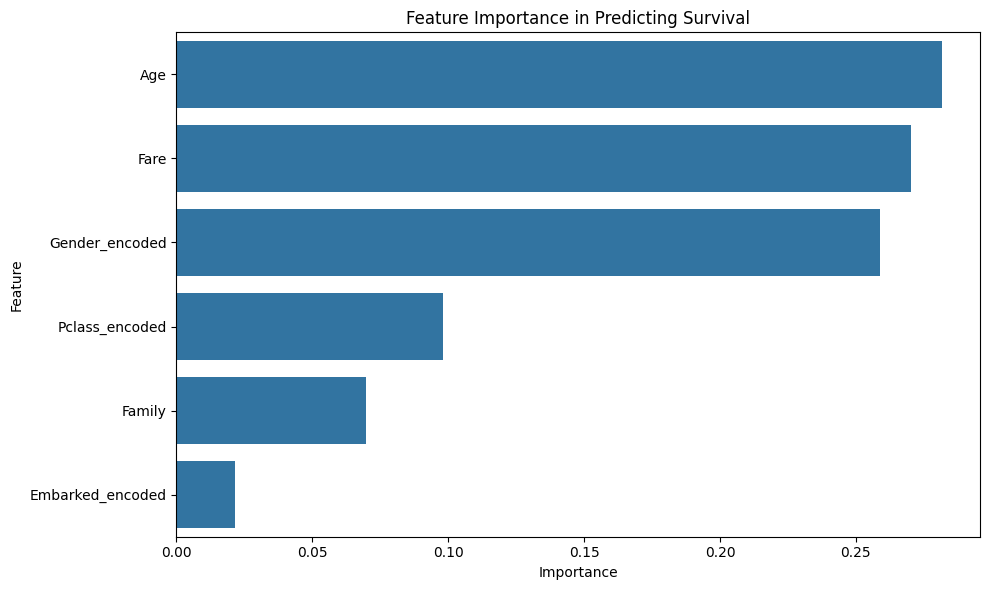

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Predicting Survival')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


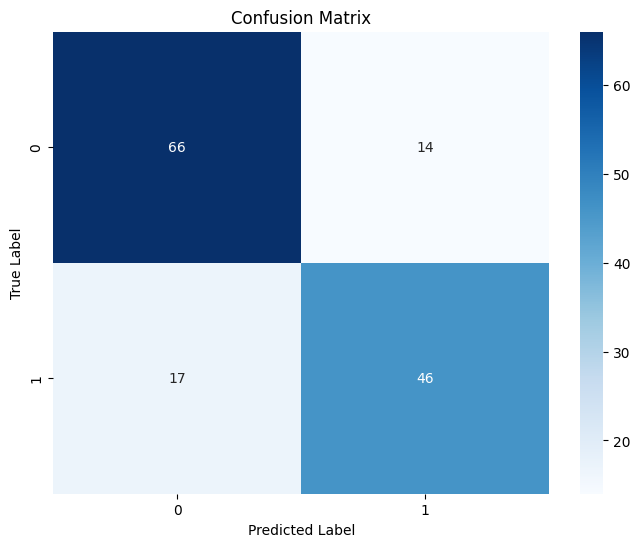

In [ ]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
survival_by_gender = df_clean.groupby('Gender')['Survived'].apply(lambda x: (x == 'Yes').mean() * 100)
print("\
Survival Rate by Gender:")
print(survival_by_gender)

Survival Rate by Gender:
Gender
Female    75.289575
Male      20.529801
Name: Survived, dtype: float64


In [ ]:
survival_by_class = df_clean.groupby('Pclass')['Survived'].apply(lambda x: (x == 'Yes').mean() * 100)
print("\
Survival Rate by Passenger Class:")
print(survival_by_class)


Survival Rate by Passenger Class:
Pclass
First class     65.217391
Second Class    47.976879
Third class     23.943662
Name: Survived, dtype: float64
